# Insurance Claims- Fraud Detection

In [1]:
#importing all the required libraries for EDA and vizualiztion.
import pandas as pd    # library for EDA.
import numpy as np     # library for numerical calculations.
import seaborn as sns  # library for vizualization.
import matplotlib.pyplot as plt  # library for vizualization.
import math
import warnings
warnings.filterwarnings('ignore')  # to ignore warnings

In [2]:
#lets load dataset 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
#lets check the type of dataset
type(df)
#since our dataset is already dataframe, no need to again make dataframe

pandas.core.frame.DataFrame

In [4]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Exploratory Data Analysis(EDA)

In [5]:
#print columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
#checking rows and columns
df.shape

(1000, 40)

In [7]:
#checking datatype of each column
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
#  check null values and summing up columns wise
print('Total null values= ',df.isnull().sum().sum())
df.isnull().sum()

Total null values=  1000


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

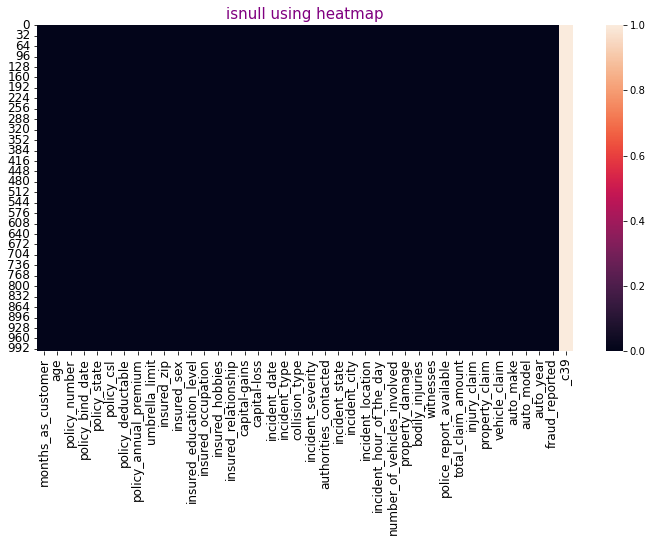

In [10]:
#isnull using heat map
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.title('isnull using heatmap', fontsize=15, color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observations:

from the above outcomes

* Dataset has 1000 row and 40 columns
* All the columns have no null values except _c39 column
* In the heat map there are lines  shows null values in the columns
* Dataset contains float64 and object datatypes.

# Data cleaning (dealing with null values)

In [11]:
df.drop('_c39', inplace= True, axis=1)

In [12]:
df.isnull().sum().sum()

0

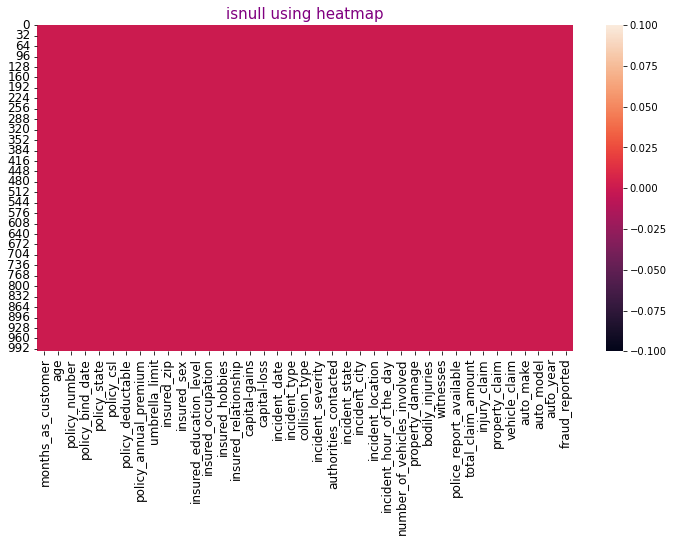

In [13]:
#isnull using heat map
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.title('isnull using heatmap', fontsize=15, color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observations

* After removing null values our dataset 1000 rows and 39 columns
* The heat map for null values is clean and plane.

In [14]:
# label encoding
df['fraud_reported']=df['fraud_reported'].replace('N',0).replace('Y',1)

In [15]:
df['property_damage'].unique()
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [16]:
df['police_report_available'].unique()
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [17]:
df.sample(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
424,150,31,651948,28-09-1994,IN,500/1000,1000,1354.50,0,456602,...,3,YES,64800,6480,12960,45360,Suburu,Forrestor,2000,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
641,362,55,636843,01-12-2008,OH,100/300,1000,1097.99,0,442239,...,3,NO,39690,0,0,39690,Suburu,Legacy,1998,0


In [18]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# Vizualization

<Figure size 1080x432 with 0 Axes>

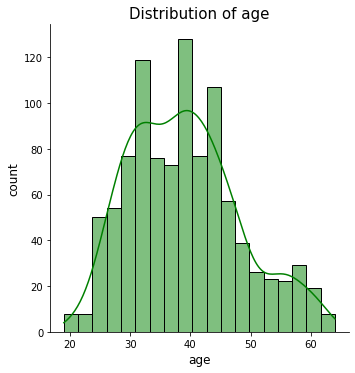

In [19]:
# age distribution of customers
plt.figure(figsize=(15,6))
sns.displot(df['age'], kde= True, color='green')
plt.title('Distribution of age', fontsize=15)
plt.xlabel('age', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

### Observatiosn

* Age of customers is distributed from 19 to 61 years old
* Maximum number of custoers are of age range 30 t0 45 year old

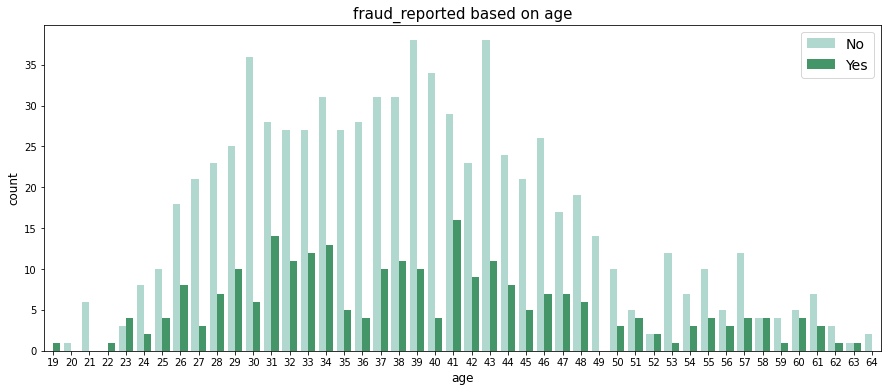

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(df['age'], hue= df['fraud_reported'],palette='BuGn')
plt.title('fraud_reported based on age', fontsize=15)
plt.xlabel('age', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(labels=['No','Yes'],fontsize=14)
plt.show()

### Observations

* From the above outcome we can see that most of the frauds are reported for customers of age between 31 to 45 years old.
* highest number of frauds are reported for age 31 and 41

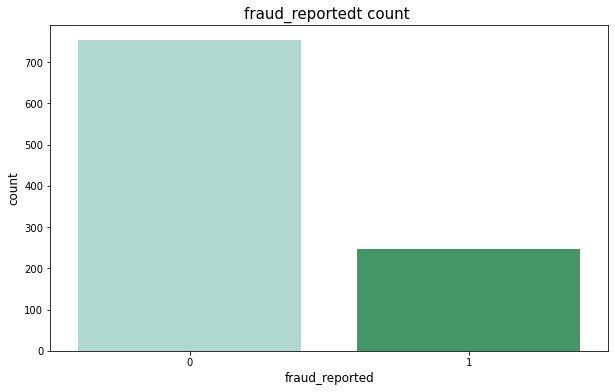

0    753
1    247
Name: fraud_reported, dtype: int64

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(df['fraud_reported'], palette='BuGn')
plt.title('fraud_reportedt count ', fontsize=15)
plt.xlabel('fraud_reported', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

df['fraud_reported'].value_counts()

### Observations

* From 1000 records of customers 247 have reported as Fraud claims
* It means according to our dataset around 25 % claims are fraud.

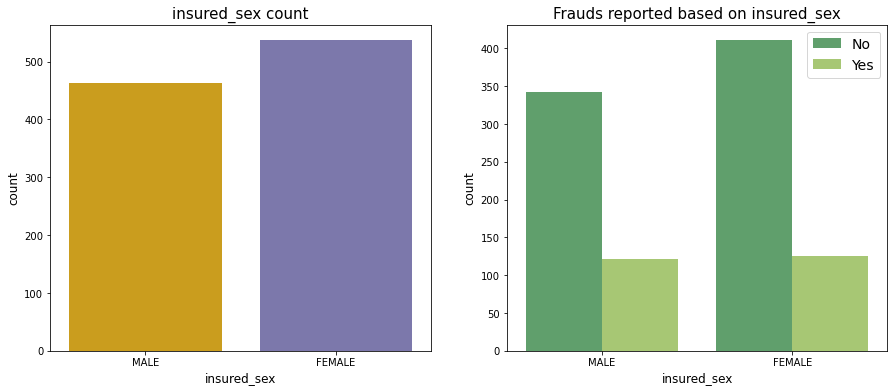

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


In [22]:

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['insured_sex'], palette='Dark2_r')
plt.title('insured_sex count', fontsize=15)
plt.xlabel('insured_sex', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df['insured_sex'], hue= df['fraud_reported'],palette='summer')
plt.title('Frauds reported based on insured_sex', fontsize=15)
plt.xlabel('insured_sex', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(labels=['No','Yes'],fontsize=14)

plt.show()

print(df['insured_sex'].value_counts())

### Observations

* Among 1000 customers from our dataset 537 are females and 463 are males
* Male customers has more fraud claims percentage compared to females.
* Among 537 Female customers around 125 customers have done fraud claims and Among 463 male customers around 123 customers have done fruad claims

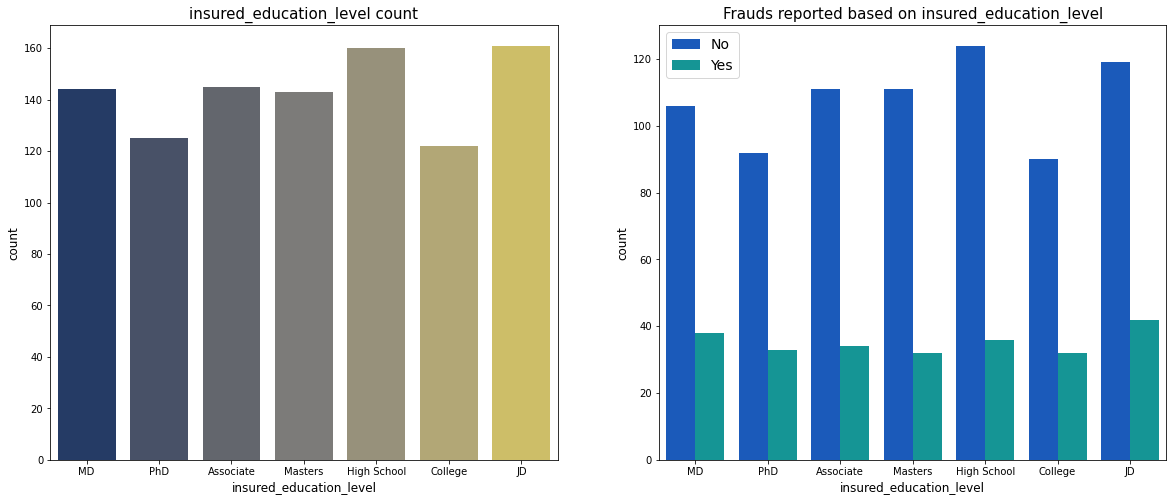

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


In [23]:

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(df['insured_education_level'], palette='cividis')
plt.title('insured_education_level count', fontsize=15)
plt.xlabel('insured_education_level', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df['insured_education_level'], hue= df['fraud_reported'],palette='winter')
plt.title('Frauds reported based on insured_education_level', fontsize=15)
plt.xlabel('insured_education_level', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(labels=['No','Yes'],fontsize=14)

plt.show()

print(df['insured_education_level'].value_counts())

### Observations

* The highest number of customers are having jurius doctrate(JD) and High school education level.
* JD's are 161  and customers with High school education level are 160.
* Customers with only College education level are 122 
* JD's and MD's have done slight more fraud calims compared to others

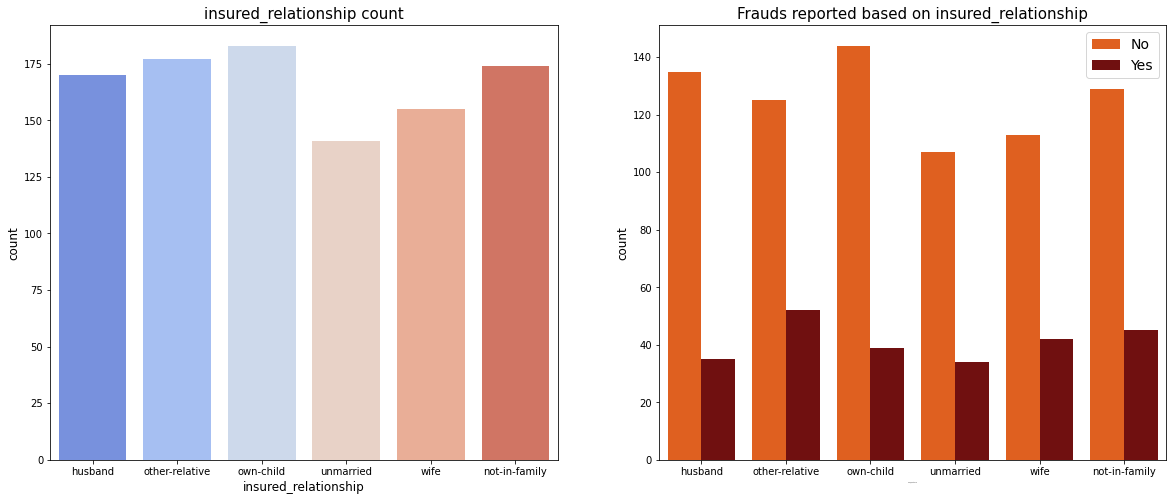

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


In [24]:

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(df['insured_relationship'], palette='coolwarm')
plt.title('insured_relationship count', fontsize=15)
plt.xlabel('insured_relationship', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df['insured_relationship'], hue= df['fraud_reported'],palette='gist_heat_r')
plt.title('Frauds reported based on insured_relationship', fontsize=15)
plt.xlabel('insured_relationship', fontsize=1)
plt.ylabel('count', fontsize=12)
plt.legend(labels=['No','Yes'],fontsize=14)

plt.show()

print(df['insured_relationship'].value_counts())

### Observations

* In the dataset the customers with own-child have more records 183 which is highest compared to others.
* Among others, customers with other relative have done more frauds.

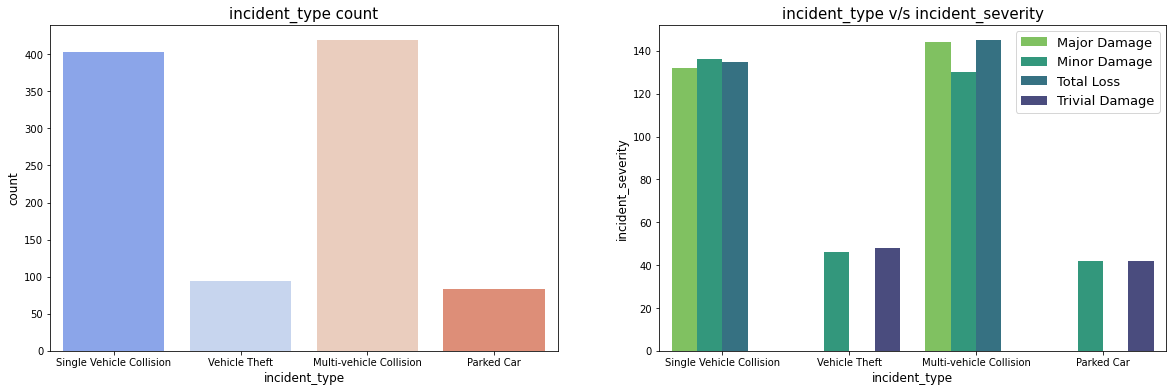

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [25]:
#label encoding
df['incident_severity']= df['incident_severity'].replace('Major Damage', 0).replace('Minor Damage', 1).replace('Total Loss', 2).replace('Trivial Damage', 3)

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(df['incident_type'], palette='coolwarm')
plt.title('incident_type count', fontsize=15)
plt.xlabel('incident_type', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.subplot(1,2,2)
sns.countplot(df['incident_type'], hue=df['incident_severity'], palette='viridis_r')
plt.title('incident_type v/s incident_severity', fontsize=15)
plt.legend(labels=['Major Damage','Minor Damage', 'Total Loss', 'Trivial Damage'], fontsize=13)
plt.xlabel('incident_type', fontsize=12)
plt.ylabel('incident_severity', fontsize=12)

plt.show()

df['incident_type'].value_counts()

### Observations

* Totally the dataste have records for 4 types of incidents , Multi-vehicle Collision, Single Vehicle Collision, Vehicle Theft , Parked Car.
* Claims for multi vehicle(419 records) and single vehice(403 records) collision are more compared to others
* Multi - vehicle collisions and single vehicle collisions  have made major damage compared to other type of incients
* Vehicle theft and Parked car have caused only minor damages and trivial no major damages has been reported.

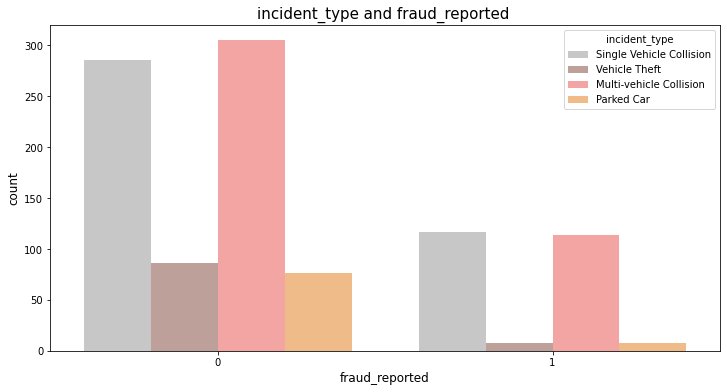

In [184]:
plt.figure(figsize=(12,6))
sns.countplot(df['fraud_reported'], hue=df['incident_type'], palette='tab20_r')
plt.title('incident_type and fraud_reported ', fontsize=15)
plt.xlabel('fraud_reported', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

### Observations

* Frauds has been reported more in multivehicle collision and single vehicle collision.

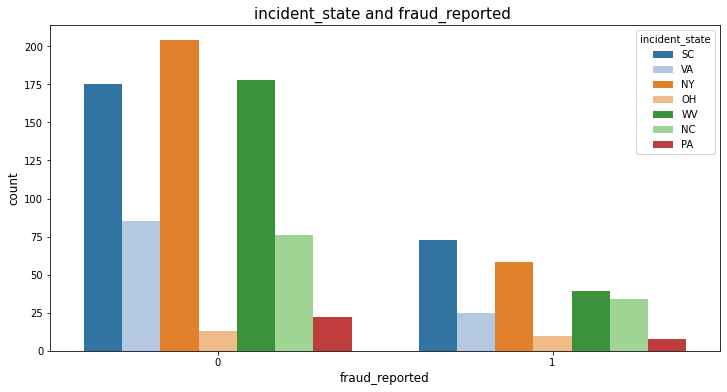

In [186]:
plt.figure(figsize=(12,6))
sns.countplot(df['fraud_reported'], hue=df['incident_state'], palette='tab20')
plt.title('incident_state and fraud_reported ', fontsize=15)
plt.xlabel('fraud_reported', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

### Observations

* As you can see above that NY has more claims compared to others.
* But if you see SC has more fraud claims compared to others.

# Describing dataset

In [28]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,NaN,NaN,NaN,203.954,115.113174,0.0,115.75,199.5,276.25,479.0
age,1000.0,NaN,NaN,NaN,38.948,9.140287,19.0,32.0,38.0,44.0,64.0
policy_number,1000.0,NaN,NaN,NaN,546238.648,257063.005276,100804.0,335980.25,533135.0,759099.75,999435.0
policy_bind_date,1000,951,01-01-2006,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_state,1000,3,OH,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_csl,1000,3,250/500,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,1000.0,NaN,NaN,NaN,1136.0,611.864673,500.0,500.0,1000.0,2000.0,2000.0
policy_annual_premium,1000.0,NaN,NaN,NaN,1256.40615,244.167395,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,NaN,NaN,NaN,1101000.0,2297406.598118,-1000000.0,0.0,0.0,0.0,10000000.0
insured_zip,1000.0,NaN,NaN,NaN,501214.488,71701.610941,430104.0,448404.5,466445.5,603251.0,620962.0


# Correlation

In [29]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,-0.059581,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,-0.058439,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,-0.015719,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,-0.015711,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.011155,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,0.009466,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,-0.023855,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.013396,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.018647,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
incident_severity,-0.059581,-0.058439,-0.015719,-0.015711,-0.011155,0.009466,-0.023855,-0.013396,-0.018647,1.000000,-0.071946,-0.168719,-0.018870,-0.011127,-0.365295,-0.276980,-0.301861,-0.361958,-0.019646,-0.405988


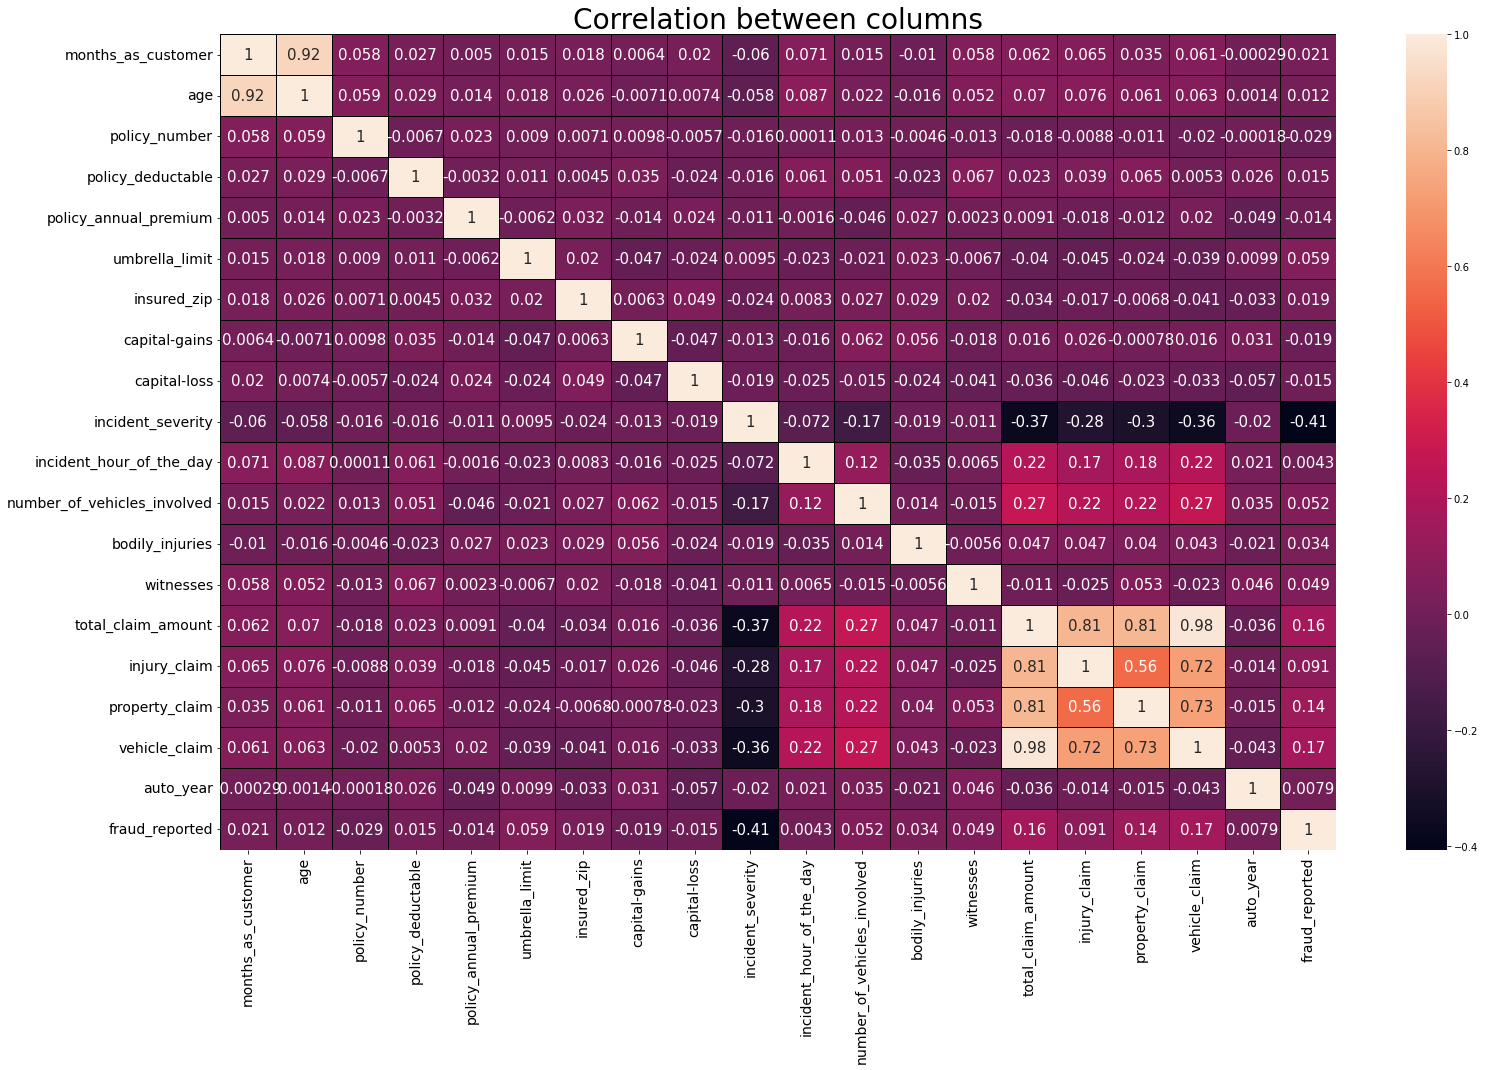

In [30]:
#df.corr() using heatmap
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),linewidth='0.5',linecolor='black',annot=True, annot_kws={'size': 15})
plt.title('Correlation between columns', size=28)
plt.xticks(size=14, rotation=90)
plt.yticks(size=14,rotation=360)
plt.show()

### Observations

* we have both Positive and negative correlation between columns and target column.
* vehicle claim is showing the highest positive correlation of 17 percent with target column
* incident_severity is showing least negative correlation of -41 percent with target column
* we might see multicolinearity between 'total_claim_amount', 'injury_claim', 'property_claim' and 'vehicle_claim' columns.

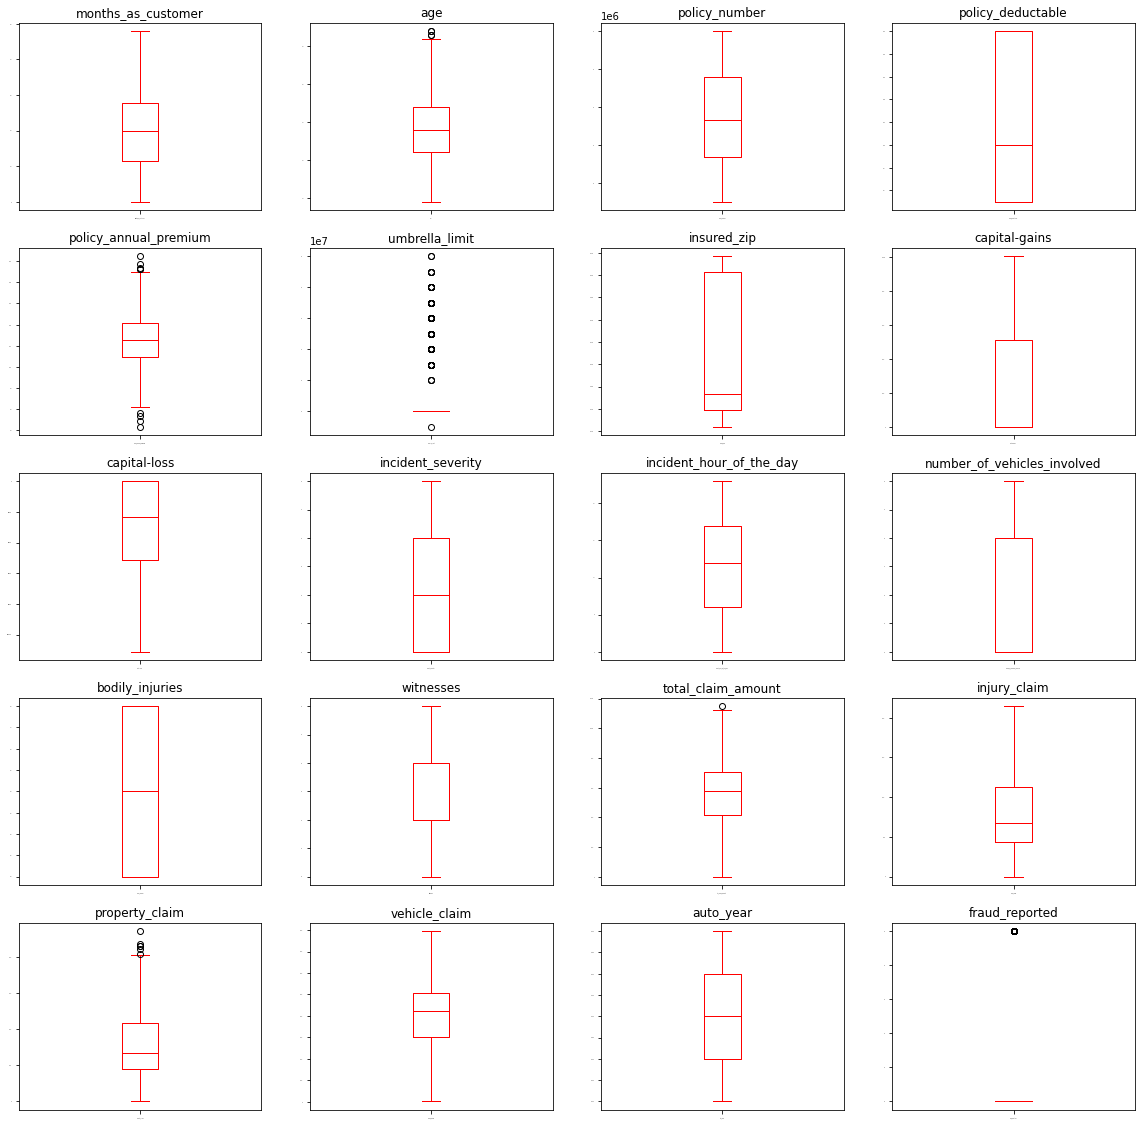

In [31]:
list_col=['months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss','incident_severity', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim','auto_year', 'fraud_reported']
df.plot(kind='box', subplots=True,title=list_col, layout=(5,4), legend= True, fontsize=1, figsize=(20,20), color='red')
plt.show()

### Observations

* Their might be iutliers present in age , property claim , umbrella limit , and property_annual_premium columns

# Skewness

In [32]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_severity              0.279016
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

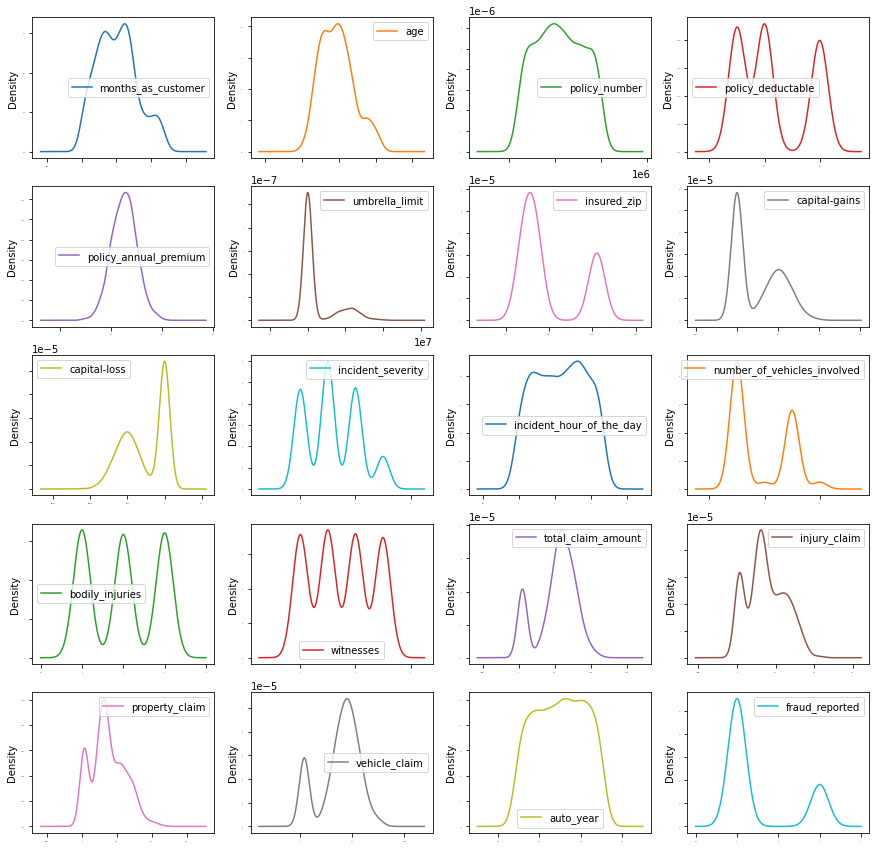

In [33]:
#vizualizing skewness
df.plot(kind='kde', subplots=True, layout=(5,4), sharex= False, legend= True, fontsize=1, figsize=(15,15))
plt.show()

### Observations

* All the numerical columns shows skewness
* Multiple peaks/ heads can be seen in columns

# Findings(insights)

* Should take extra documet verification and security for people with age 31 to 41 years old especially for males while claiming insurance
* People  with higher education level(JD's, MD's ) have done more frauds so should not neglect verification based on education.
* If the incident type is vehicle collision , In that case the respected officers should inspect the collision spot very clearly and keenly and verify every documents realted to it. Because according to our dataset more frauds have been reported in vehicle collision incident type.
* SC state has more fraud claims percentage  compared to others.
* proper strict action should be taken against overspeed and other law breaking driving cause multi vehicle collision can happen due to not following proper traffic rules.

# Data Preprocessing

# Label Encoding

In [34]:
df.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0


In [35]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity                int64
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [36]:
df1=df.copy()

In [37]:
# converting string into integer
from sklearn.preprocessing import LabelEncoder

#creating instance
le=LabelEncoder()

#training data
le.fit(df1['policy_bind_date'])
#transforming data
df1['policy_bind_date']=le.transform(df1['policy_bind_date'])

le.fit(df1['policy_state'])
df1['policy_state']=le.transform(df1['policy_state'])

le.fit(df1['policy_csl'])
df1['policy_csl']=le.transform(df1['policy_csl'])

le.fit(df1['insured_sex'])
df1['insured_sex']=le.transform(df1['insured_sex'])

le.fit(df1['insured_education_level'])
df1['insured_education_level']=le.transform(df1['insured_education_level'])

le.fit(df1['insured_occupation'])
df1['insured_occupation']=le.transform(df1['insured_occupation'])

le.fit(df1['insured_hobbies'])
df1['insured_hobbies']=le.transform(df1['insured_hobbies'])

le.fit(df1['insured_relationship'])
df1['insured_relationship']=le.transform(df1['insured_relationship'])

le.fit(df1['incident_date'])
df1['incident_date']=le.transform(df1['incident_date'])

le.fit(df1['incident_type'])
df1['incident_type']=le.transform(df1['incident_type'])

le.fit(df1['collision_type'])
df1['collision_type']=le.transform(df1['collision_type'])

le.fit(df1['authorities_contacted'])
df1['authorities_contacted']=le.transform(df1['authorities_contacted'])

le.fit(df1['incident_state'])
df1['incident_state']=le.transform(df1['incident_state'])

le.fit(df1['incident_city'])
df1['incident_city']=le.transform(df1['incident_city'])

le.fit(df1['incident_location'])
df1['incident_location']=le.transform(df1['incident_location'])

le.fit(df1['property_damage'])
df1['property_damage']=le.transform(df1['property_damage'])

le.fit(df1['police_report_available'])
df1['police_report_available']=le.transform(df1['police_report_available'])

le.fit(df1['auto_make'])
df1['auto_make']=le.transform(df1['auto_make'])

le.fit(df1['auto_model'])
df1['auto_model']=le.transform(df1['auto_model'])

In [38]:
df1.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int64
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

# Removing outliers

using Zscore technique

In [39]:
from scipy.stats import zscore

In [40]:
z =np.abs(zscore(df1['policy_annual_premium']))
print(len(np.where(z<3)))
dn=df1[(z<3)]
print('Shape of New Dataframe dn:',dn.shape)

1
Shape of New Dataframe dn: (997, 39)


In [41]:
z =np.abs(zscore(dn['umbrella_limit']))
print(z)
print(len(np.where(z<3)))
dn1=dn[(z<3)]
print('Shape of New Dataframe dn1:',dn1.shape)

0      0.480363
1      1.694577
2      1.694577
3      2.129565
4      2.129565
         ...   
995    0.480363
996    0.480363
997    0.824601
998    1.694577
999    0.480363
Name: umbrella_limit, Length: 997, dtype: float64
1
Shape of New Dataframe dn1: (990, 39)


In [42]:
z =np.abs(zscore(dn1['property_claim']))
print(z)
print(len(np.where(z<3)))
dn2=dn1[(z<3)]
print('Shape of New Dataframe dn2:',dn2.shape)

0      1.166665
1      1.372162
2      0.735381
3      0.218904
4      1.399127
         ...   
995    0.274757
996    2.216213
997    0.021704
998    0.451215
999    1.343123
Name: property_claim, Length: 990, dtype: float64
1
Shape of New Dataframe dn2: (989, 39)


In [43]:
df_new=dn2
print('old dataframe',df1.shape)
print('new dataframe',df_new.shape)
print('no of rows dropped',df1.shape[0]-df_new.shape[0])

old dataframe (1000, 39)
new dataframe (989, 39)
no of rows dropped 11


# Splitting data into x(features) and y(target)

In [44]:
#splitting data into x and y 
x=df_new.drop('fraud_reported', axis=1) # dropping target column from dataframe and assigning the dataframe as x
y=df_new['fraud_reported'] #assigning target column(W) to y variable

In [45]:
x.sample()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
745,258,41,605100,446,0,0,500,1042.25,0,601206,...,2,3,1,81240,6770,20310,54160,8,7,2008


In [46]:
y.sample()

498    1
Name: fraud_reported, dtype: int64

# VIF(checking multicolinearity)

In [47]:
#library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
VIF =[]
for i in range(len(x.columns)):
    VIF.append(variance_inflation_factor(exog=x.values, exog_idx=i))

datavif={'Features':x.columns, 'VIF value': VIF}    
vif_df=pd.DataFrame(datavif)
vif_df

,Features,VIF value
0,months_as_customer,28.570446
1,age,131.958679
2,policy_number,5.695129
3,policy_bind_date,4.073653
4,policy_state,2.591736
5,policy_csl,2.458648
6,policy_deductable,4.635157
7,policy_annual_premium,29.431793
8,umbrella_limit,1.268830
9,insured_zip,51.830933


# Feature selection

In [49]:
#dropping columns with high multicolinearity
x.drop(['total_claim_amount', 'auto_year', 'age', 'policy_annual_premium', 'insured_zip', 'number_of_vehicles_involved'], axis=1, inplace=True)

In [50]:
VIF =[]
for i in range(len(x.columns)):
    VIF.append(variance_inflation_factor(exog=x.values, exog_idx=i))

datavif={'Features':x.columns, 'VIF value': VIF}    
vif_df=pd.DataFrame(datavif)
vif_df

,Features,VIF value
0,months_as_customer,4.252765
1,policy_number,5.441772
2,policy_bind_date,3.904849
3,policy_state,2.541680
4,policy_csl,2.427029
5,policy_deductable,4.332059
6,umbrella_limit,1.261566
7,insured_sex,1.880514
8,insured_education_level,3.346864
9,insured_occupation,3.592200


* Multicolinearity issue has been resolved

# Removing skewness

In [51]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [52]:
x_df=pd.DataFrame(x)
x_df.skew()

0    -0.132406
1    -0.160913
2    -0.293502
3    -0.148031
4    -0.098103
5     0.000000
6    -7.886588
7     0.140088
8    -0.188764
9    -0.238667
10   -0.247521
11   -0.161915
12    0.033062
13    0.081902
14   -0.264013
15   -0.092839
16   -0.205244
17   -0.078600
18   -0.226221
19   -0.254584
20   -0.182282
21   -0.287907
22   -0.256250
23   -0.092344
24   -0.133703
25   -0.151299
26   -0.114218
27   -0.416794
28   -0.363857
29   -0.524394
30   -0.229106
31   -0.278829
dtype: float64

# scaling independent data

using StandardScaler

In [53]:
#mean=0, std=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
scaler.fit(x)
x_scaled=scaler.transform(x)

# Model Building and Evaluation

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Logistic Regression

## Finding Best Random State for Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
#creating instance 
LR=LogisticRegression()

In [57]:
maxAcc=0
maxRS=0

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    LR.fit(x_train,y_train)
    pred_LR=LR.predict(x_test)
    acc=accuracy_score(y_test,pred_LR)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.8181818181818182 random_state 1
Accuracy 0.8333333333333334 random_state 3
Accuracy 0.8484848484848485 random_state 122
Accuracy 0.8636363636363636 random_state 123
Accuracy 0.8737373737373737 random_state 667


# Model building with best random state

In [58]:
#creating train , test split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.20,random_state=667)

#creating instance 
LR=LogisticRegression()

#traing data
LR.fit(x_train1,y_train1)

#predicting data
LR_pred=LR.predict(x_test1)

# Evaluation

In [59]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test1,LR_pred))
#print confusion matrics
print(confusion_matrix(y_test1,LR_pred))
#printing classification report
print(classification_report(y_test1,LR_pred))

Accuracy:  0.8737373737373737
[[155  11]
 [ 14  18]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       166
           1       0.62      0.56      0.59        32

    accuracy                           0.87       198
   macro avg       0.77      0.75      0.76       198
weighted avg       0.87      0.87      0.87       198



In [91]:
print('Accuracy of train model: ',LR.score(x_train1,y_train1))

Accuracy of train model:  0.7838179519595448


In [92]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',155/(155+14) )
print('precision for 1(YES) =', 18/(18+11))

precision for 0(NO) =  0.9171597633136095
precision for 1(YES) = 0.6206896551724138


In [93]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',155/(155+11))
print('recall for 1(YES) =',18/(18+14))

recall for 0(NO) = 0.9337349397590361
recall for 1(YES) = 0.5625


# cross validation

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
scr=cross_val_score(LR,x_scaled,y,cv=4)
print('cross validation score of LogisticRegression: ',scr.mean())

cross validation score of LogisticRegression:  0.7907021353010317


# Decision Tree Classifier

## Finding Best Random State for Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
maxAcc=0
maxRS=0

for i in range(1,2500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    DTC=DecisionTreeClassifier() #creating instance 
    DTC.fit(x_train,y_train)  #traing data
    DTC_pred=DTC.predict(x_test) #predicting data.fit(x_train,y_train)
    acc=accuracy_score(y_test,DTC_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.7878787878787878 random_state 1
Accuracy 0.8080808080808081 random_state 2
Accuracy 0.8181818181818182 random_state 3
Accuracy 0.8383838383838383 random_state 12
Accuracy 0.8686868686868687 random_state 49
Accuracy 0.8737373737373737 random_state 734
Accuracy 0.8787878787878788 random_state 1541


## Model building with best random state

In [64]:
#creating train , test split
x_train2,x_test2,y_train2,y_test2=train_test_split(x_scaled,y,test_size=0.20,random_state=1541)

DTC=DecisionTreeClassifier() #creating instance 
DTC.fit(x_train2,y_train2)  #traing data
DTC_pred=DTC.predict(x_test2) #predicting data

In [65]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test2,DTC_pred)*100)
#print confusion matrics
print(confusion_matrix(y_test2,DTC_pred))
#printing classification report
print(classification_report(y_test2,DTC_pred))

Accuracy:  86.86868686868688
[[137  11]
 [ 15  35]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       148
           1       0.76      0.70      0.73        50

    accuracy                           0.87       198
   macro avg       0.83      0.81      0.82       198
weighted avg       0.87      0.87      0.87       198



In [88]:
print('Accuracy of train model: ',DTC.score(x_train2,y_train2))

Accuracy of train model:  1.0


In [89]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',137/(137+15) )
print('precision for 1(YES) =',35/(35+11))

precision for 0(NO) =  0.9013157894736842
precision for 1(YES) = 0.7608695652173914


In [90]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',137/(137+11))
print('recall for 1(YES) =',35/(35+15))

recall for 0(NO) = 0.9256756756756757
recall for 1(YES) = 0.7


# cross validation

In [66]:
scr=cross_val_score(DTC,x_scaled,y,cv=5)
print('cross validation score of DecissionTreeClassifier: ',scr.mean()*100)

cross validation score of DecissionTreeClassifier:  78.66635902168896


# Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

maxAcc=0
maxRS=0

for i in range(50,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    RFC=RandomForestClassifier(random_state=42) #creating instance 
    RFC.fit(x_train,y_train)  #traing data
    RFC_pred=RFC.predict(x_test) #predicting data
    acc=accuracy_score(y_test,RFC_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.7929292929292929 random_state 50
Accuracy 0.803030303030303 random_state 54
Accuracy 0.8181818181818182 random_state 65
Accuracy 0.8232323232323232 random_state 90
Accuracy 0.8282828282828283 random_state 113
Accuracy 0.8434343434343434 random_state 123
Accuracy 0.8535353535353535 random_state 299


## Model building with best random state

In [68]:
#creating train , test split
x_train3,x_test3,y_train3,y_test3=train_test_split(x_scaled,y,test_size=0.20,random_state=299)

RFC=RandomForestClassifier(random_state=42) #creating instance 
RFC.fit(x_train3,y_train3)  #traing data
RFC_pred=RFC.predict(x_test3) #predicting data

# Evaluation

In [69]:
#checking score for training model
print('Score for training model :',RFC.score(x_train3,y_train3))

Score for training model : 1.0


In [70]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test3,RFC_pred))
#print confusion matrics
print(confusion_matrix(y_test3,RFC_pred))
#printing classification report
print(classification_report(y_test3,RFC_pred))

Accuracy:  0.8535353535353535
[[152   8]
 [ 21  17]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       160
           1       0.68      0.45      0.54        38

    accuracy                           0.85       198
   macro avg       0.78      0.70      0.73       198
weighted avg       0.84      0.85      0.84       198



In [86]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',152/(152+21))
print('precision for 1(YES) =',17/(17+8))

precision for 0(NO) =  0.8786127167630058
precision for 1(YES) = 0.68


In [87]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',152/(152+8))
print('recall for 1(YES) =',17/(17+21))

recall for 0(NO) = 0.95
recall for 1(YES) = 0.4473684210526316


# cross validation

In [71]:
scr=cross_val_score(RFC,x_scaled,y,cv=19)
print('cross validation score of RandomForestClassifier at cv folds 19 : ',round(scr.mean(),2)*100)

cross validation score of RandomForestClassifier at cv folds 19 :  78.0


# Suppport Vector Classifier(SVC)

## Finding Best Random State for Suppport Vector Classifier(SVC)

In [72]:
from sklearn.svm import SVC

maxAcc=0
maxRS=0

for i in range(50,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    svc_pred=svc.predict(x_test)
    acc=accuracy_score(y_test,svc_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.7777777777777778 random_state 50
Accuracy 0.803030303030303 random_state 54
Accuracy 0.8131313131313131 random_state 65
Accuracy 0.8181818181818182 random_state 126
Accuracy 0.8282828282828283 random_state 198
Accuracy 0.8333333333333334 random_state 550
Accuracy 0.8686868686868687 random_state 667


## Model building with best random state

In [74]:
#creating train , test split
x_train4,x_test4,y_train4,y_test4=train_test_split(x_scaled,y,test_size=0.20,random_state=667)

#creating instance
svc=SVC()
#training data
svc.fit(x_train4,y_train4)
#predicting data
svc_pred=svc.predict(x_test4)

# Evaluation

In [75]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test4,svc_pred))
#print confusion matrics
print(confusion_matrix(y_test4,svc_pred))
#printing classification report
print(classification_report(y_test4,svc_pred))

Accuracy:  0.8686868686868687
[[160   6]
 [ 20  12]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       166
           1       0.67      0.38      0.48        32

    accuracy                           0.87       198
   macro avg       0.78      0.67      0.70       198
weighted avg       0.85      0.87      0.85       198



In [76]:
#checking score for training model
print('Score for training model :',svc.score(x_train4,y_train4))

Score for training model : 0.9026548672566371


In [77]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',160/(160+20))
print('precision for 1(YES) =',12/(12+6))

precision for 0(NO) =  0.8888888888888888
precision for 1(YES) = 0.6666666666666666


In [78]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',160/(160+6))
print('recall for 1(YES) =',12/(12+20))

recall for 0(NO) = 0.963855421686747
recall for 1(YES) = 0.375


# cross validation

In [85]:
scr=cross_val_score(svc,x_scaled,y,cv=6)
print('cross validation score of SuperVectorClassifier: ',round(scr.mean(),2)*100)

cross validation score of SuperVectorClassifier:  77.0


# Hyper parameter tuning: ensemble techniques

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
DTC=DecisionTreeClassifier()

In [150]:
random_state=list(np.arange(1,150))
parameters={'criterion': ["gini"],'splitter' : ["best"], 'min_samples_split':[1,2,3,4,5,6], 'min_samples_leaf':[1],'random_state':random_state}

In [151]:
GCV= GridSearchCV(DTC, parameters)
GCV.fit(x_train2,y_train2)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'min_samples_leaf': [1],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'splitter': ['best']})

In [152]:
GCV.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'random_state': 125,
 'splitter': 'best'}

In [134]:
GCV.best_estimator_

DecisionTreeClassifier(min_samples_leaf=2, random_state=28)

In [162]:
DTC_best=DecisionTreeClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=6, random_state=85, splitter='best') 
DTC_best.fit(x_train2,y_train2)  #training data
DTC_best_pred=DTC_best.predict(x_test2) #predicting data

# Evaluation

In [163]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test2,DTC_best_pred)*100)
#print confusion matrics
print(confusion_matrix(y_test2,DTC_best_pred))
#printing classification report
print(classification_report(y_test2,DTC_best_pred))

Accuracy:  87.87878787878788
[[137  11]
 [ 13  37]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       148
           1       0.77      0.74      0.76        50

    accuracy                           0.88       198
   macro avg       0.84      0.83      0.84       198
weighted avg       0.88      0.88      0.88       198



we have improved from 86.86 to 87.87 after hyper parameter tuning.

In [165]:
print('Accuracy of train model: ',DTC_best.score(x_train2,y_train2)*100)

Accuracy of train model:  97.97724399494311


In [166]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',137/(137+13) )
print('precision for 1(YES) =',37/(37+11))

precision for 0(NO) =  0.9133333333333333
precision for 1(YES) = 0.7708333333333334


In [168]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',137/(137+11))
print('recall for 1(YES) =',37/(37+13))

recall for 0(NO) = 0.9256756756756757
recall for 1(YES) = 0.74


# cross validation

In [174]:
scr=cross_val_score(DTC_best,x_scaled,y,cv=5)
print('cross validation score of DecissionTreeClassifier: ',scr.mean()*100)

cross validation score of DecissionTreeClassifier:  81.19571347997746


# ROC AUC curve

In [175]:
from sklearn.metrics import plot_roc_curve

<Figure size 864x432 with 0 Axes>

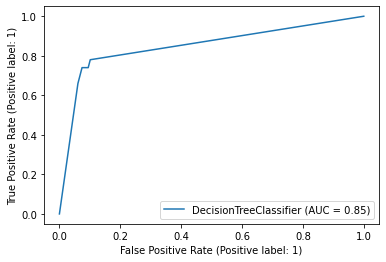

In [179]:
plot_roc_curve(DTC_best,x_test2,y_test2)
plt.show()

# Model Saving

In [180]:
import pickle

In [181]:
DTC_best_file2='insurance_fraud.pkl'
pickle.dump(DTC_best,open(DTC_best_file2,'wb'))

# Conclusion

* I have choosed Decission tree clasiifier as my final model on the basis of its accuracy score, cv score, f1score ,presicion , recall and ROC curve score.
* our final model is giving accuracy score of 86.86 which is highest and best score among other models.
* There is leass difference between cross validation score and accuracy score for this model, it means the model is less underitting/overfitting compared to other models
* The ROC score is 0.85 which is also a good score.